# Projections

In [142]:
### Import libraries

import numpy as np
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import powerlaw as pl

In [133]:
### Load bipartite network

filename = "../data/AMZ/binet-AMZ-Rw.gml"
g = ig.read(filename)
print(g.summary())

IGRAPH UNWT 16213 30872 -- 
+ attr: id (v), name (v), ranking (v), type (v), weight (e)


In [211]:
sorted(degree_list, reverse=True)

[0.42077345340159134,
 0.19441189169185222,
 0.11336581755381483,
 0.06568802812557824,
 0.048602972922963054,
 0.035588725097144266,
 0.025288348855856412,
 0.021155862579411582,
 0.01387775242089681,
 0.010670449639178438,
 0.0072781101585147725,
 0.007216431258866342,
 0.005304385369765003,
 0.0034540183803120953,
 0.0030222660827730835,
 0.0025905137852340714,
 0.0024054770862887804,
 0.00222044038734349,
 0.0018503669894529083,
 0.0012335779929686054,
 0.001110220193671745,
 0.0009868623943748843,
 0.0008635045950780238,
 0.0008018256954295935,
 0.0007401467957811633,
 0.0006167889964843027,
 0.0004317522975390119,
 0.0004317522975390119,
 0.00030839449824215134,
 0.00030839449824215134,
 0.00030839449824215134,
 0.00030839449824215134,
 0.00030839449824215134,
 0.0002467155985937211,
 0.0002467155985937211,
 0.0002467155985937211,
 0.0002467155985937211,
 0.00018503669894529083,
 0.00018503669894529083,
 0.00018503669894529083,
 0.00018503669894529083,
 0.00018503669894529083,
 0

Values less than or equal to 0 in data. Throwing out 0 or negative values
/home/hddr/anaconda3/envs/newone/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in power
  


1.2006740985313014
1e-06
0.007


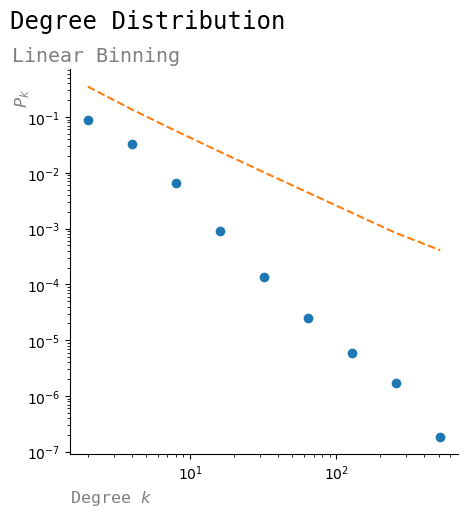

In [224]:
max_degree = max(graph.degree())

degree_list = np.zeros(max_degree, dtype=int)

for node in graph.vs():
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)
total_grados = sum(degree_list)
# Normalizar la lista dividiendo cada valor por la suma total de grados
degree_list = [grado / total_grados for grado in degree_list]
results = pl.Fit(degree_list, xmin=0.000001, xmax=0.007)
print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.xmax)
R, p = results.distribution_compare('power_law', 'lognormal')
test = np.arange(max_degree)
test = test ** -results.power_law.alpha
#test = test ** -2.3
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
n_log_bin = ceil(log2(max(graph.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
x_test, y_test = calculate_log_binning(test, n_log_bin)
ax.plot(x_values, y_values, "o", ls='None')
ax.plot(x_test, y_test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

[0.42077345340159134, 0.19441189169185222, 0.11336581755381483, 0.06568802812557824, 0.048602972922963054]


/home/hddr/anaconda3/envs/newone/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


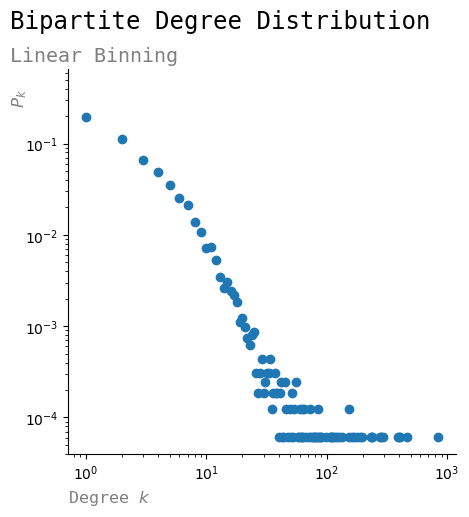

In [225]:
### Distribución de graddos
graph = g

max_degree = max(graph.degree())
degree_list = np.zeros(max_degree, dtype=int)
for node in graph.vs():
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)
total_grados = sum(degree_list)

# Normalizar la lista dividiendo cada valor por la suma total de grados
degree_list = [grado / total_grados for grado in degree_list]
print(degree_list[0:5])
sorted_data = np.sort(degree_list)
yvals = np.arange(1, len(sorted_data) + 1) / float(len(sorted_data))

def power_law_fit(x, a, b):
    return a * np.power(x, b)

# Fit the power-law curve
params, covariance = curve_fit(power_law_fit, sorted_data, yvals)
fitted_yvals = power_law_fit(sorted_data, *params)

fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
ax.plot(range(max_degree), degree_list, "o", ls='None')
#plt.plot(sorted_data, yvals, marker='.', linestyle='none', color='blue', label='Original Data')
#plt.plot(sorted_data, fitted_yvals, 'r-', label='Fitted Power-law Curve')
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Bipartite Degree Distribution", size="xx-large", family='monospace', x=0.43, y=1)
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
/home/hddr/anaconda3/envs/newone/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


1.4637661334299192
0.00012335779929686054
None


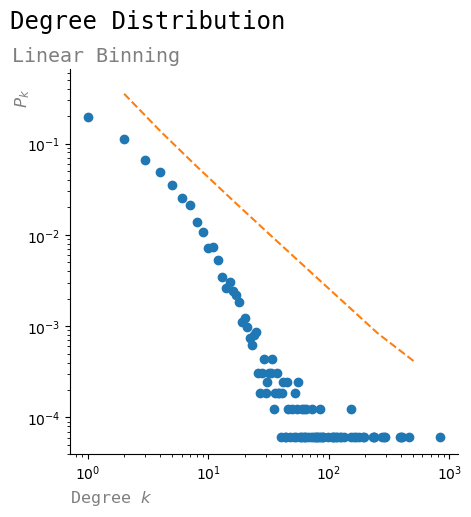

In [227]:
max_degree = max(graph.degree())

degree_list = np.zeros(max_degree, dtype=int)

for node in graph.vs():
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)
total_grados = sum(degree_list)
# Normalizar la lista dividiendo cada valor por la suma total de grados
degree_list = [grado / total_grados for grado in degree_list]

results = pl.Fit(degree_list)
print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.xmax)
R, p = results.distribution_compare('power_law', 'lognormal')
test = np.arange(max_degree)
test = test ** -results.power_law.alpha


fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
ax.plot(range(max_degree), degree_list, "o", ls='None')
ax.plot(x_test, y_test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

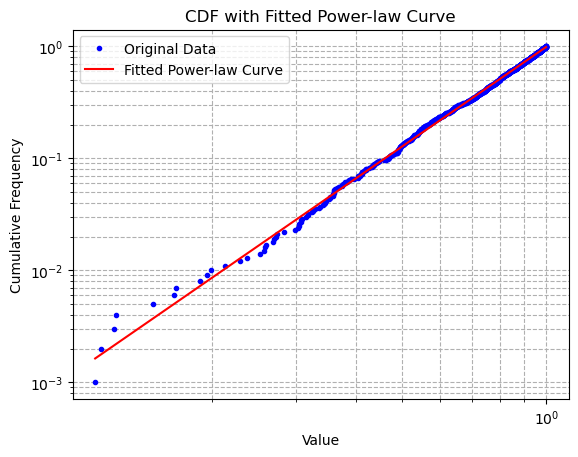

In [121]:
from scipy.optimize import curve_fit
# Generate power-law distributed data
# Parameters
alpha = 3.0  # Exponent of the distribution
size = 1000  # Number of data points
data = np.random.power(a=alpha, size=size)

# Power-law fitting function
sorted_data = np.sort(data)
yvals = np.arange(1, len(sorted_data) + 1) / float(len(sorted_data))

def power_law_fit(x, a, b):
    return a * np.power(x, b)
# Fit the power-law curve
params, covariance = curve_fit(power_law_fit, sorted_data, yvals)
# Generate fitted values
fitted_yvals = power_law_fit(sorted_data, *params)
# Plot the original CDF and the fitted power-law curve
plt.plot(sorted_data, yvals, marker='.', linestyle='none', color='blue', label='Original Data')
plt.plot(sorted_data, fitted_yvals, 'r-', label='Fitted Power-law Curve')
plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.title('CDF with Fitted Power-law Curve')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [83]:
def calculate_log_binning(degree_distribution, n_bins):
    """Compute the log-binning y-values in the degree distribution.

    Divides the degree distribution in `n_bins` segments.

    Parameters
    ----------
    degree_distribution: list
        Network degree distribution.
    n_bins:
        Number of bins to assign.

    Returns
    -------
    (list, list)
        The (x_values, y_values_log_bin_list) tuple.
    """
    current_sum = 0
    previous_k = 0
    y_values_log_bin_list = []
    x_values = []

    for i in range(1, n_bins):
        x_values.append(previous_k)
        current_k = 2 ** (i)
        current_sum = current_sum + current_k
        temp_y_value = sum(degree_distribution[previous_k:current_k])
        temp_y_value = temp_y_value / (current_k-previous_k)
        y_values_log_bin_list.append(temp_y_value)
        previous_k = current_k

        if current_sum > len(degree_distribution):
            x_values.append(previous_k)
            temp_y_value = sum(
                degree_distribution[previous_k:len(degree_distribution)])
            temp_y_value = temp_y_value / (len(degree_distribution)-previous_k)
            y_values_log_bin_list.append(temp_y_value)
            break

    return x_values, y_values_log_bin_list

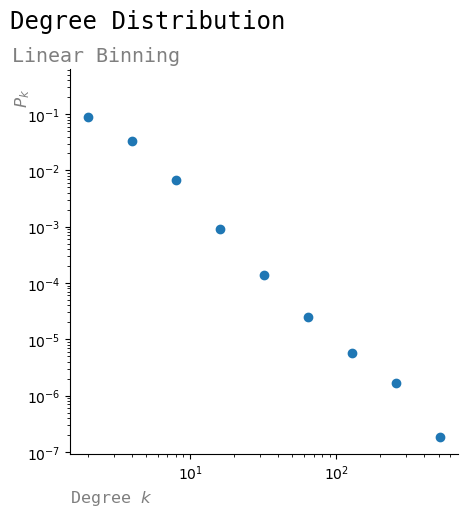

In [84]:
from math import log2, ceil
fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
n_log_bin = ceil(log2(max(graph.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
ax.plot(x_values, y_values, "o", ls='None')
#ax.plot(range(max_degree), test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

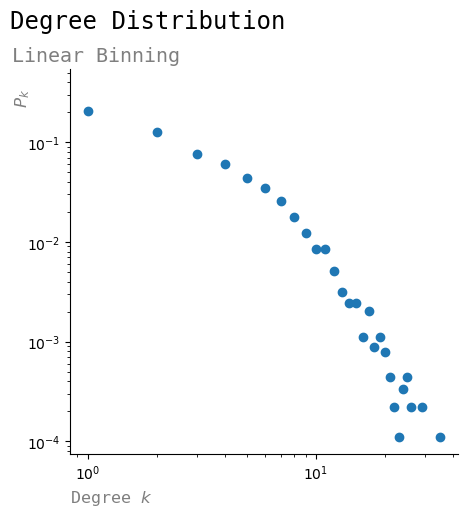

In [23]:
### User degree distribution in bipartite graph

# Selection of user nodes

graph = g.vs.select(type=0)

max_degree = max(graph.degree())

degree_list = np.zeros(max_degree, dtype=int)

for node in graph:
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / len(graph)

#result = ig.power_law_fit(graph.degree())

#test = np.arange(max_degree)
#test = test ** -result.alpha

fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
ax.plot(range(max_degree), degree_list, "o", ls='None')
#ax.plot(range(max_degree), test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

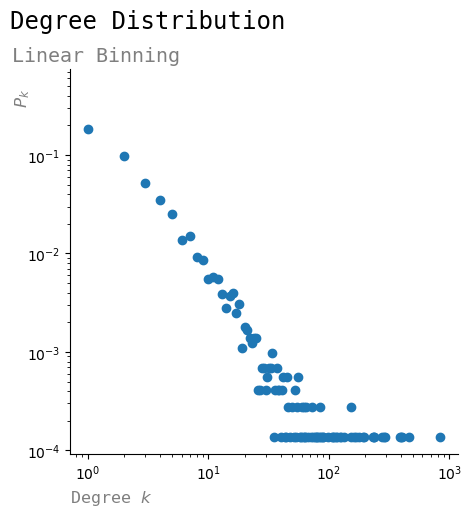

In [24]:
### User degree distribution in bipartite graph

# Selection of user nodes

graph = g.vs.select(type=1)

max_degree = max(graph.degree())

degree_list = np.zeros(max_degree, dtype=int)

for node in graph:
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / len(graph)

#result = ig.power_law_fit(graph.degree())

#test = np.arange(max_degree)
#test = test ** -result.alpha

fig, ax = plt.subplots(figsize=(5, 5))
ax.loglog()
ax.spines[['right', 'top']].set_visible(False)
ax.plot(range(max_degree), degree_list, "o", ls='None')
#ax.plot(range(max_degree), test, ls="--")
ax.set_xlabel('Degree $k$', loc="left", size="large", family='monospace', alpha=0.5, parse_math=True)
ax.set_ylabel('$P_k$', loc="top", size="large", family='monospace',  alpha=0.5,
               parse_math=True)
ax.yaxis.set_label_coords(-0.1,0.95)
ax.set_title("Linear Binning", loc='left', size="x-large", family='monospace', x=-0.15, y=1, alpha=0.5)
plt.suptitle("Degree Distribution", size="xx-large", family='monospace', x=0.28, y=1)
plt.show()

In [20]:
g.degree()[:5]

[8, 1, 3, 3, 6]